In [158]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [159]:
#Laster ned listen over S&P500 aksjer og filtrerer disse slik at vi kan velge 10 tilfeldige askjer, med minimum 10 års historikk.

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


In [160]:
tickers = tickers.loc[tickers['Date added'] <= '2019-01-01']
tickers.shape

(415, 8)

In [161]:
tickers = tickers.Symbol
tickers = tickers.sample(n=6).tolist()

In [162]:
#Listen over 10 arbitrære selskaper fra SP500
tickers

['BMY', 'CAH', 'EQIX', 'KMI', 'STT', 'VZ']

In [163]:
#Henter data fra Yahoo
start = '2019-01-01'
end = date.today()

df = yf.download(tickers, start, end)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [164]:
df.head()

Ticker,BMY,CAH,EQIX,KMI,STT,VZ
Date,,,,,,
2019-01-02,43.614243,37.902592,318.842896,11.412254,53.979729,42.786575
2019-01-03,37.829193,37.137310,315.144287,11.347249,52.223461,42.939342
2019-01-04,39.313179,37.776436,322.295441,11.730063,54.199261,43.046268
2019-01-07,40.587578,38.516502,322.942230,11.982868,54.874752,43.321220
2019-01-08,40.235435,39.105179,329.646973,12.380129,55.111164,44.589081


In [165]:
#Kalkulerer daglig logaritmisk avkastning
returns = np.log(df/df.shift(1)).dropna()
returns.head()

Ticker,BMY,CAH,EQIX,KMI,STT,VZ
Date,,,,,,
2019-01-03,-0.142303,-0.020397,-0.011668,-0.005712,-0.033077,0.003564
2019-01-04,0.038479,0.017063,0.022438,0.033180,0.037135,0.002487
2019-01-07,0.031902,0.019401,0.002005,0.021323,0.012386,0.006367
2019-01-08,-0.008714,0.015168,0.020549,0.032615,0.004299,0.028846
2019-01-09,-0.017023,0.001719,-0.012625,0.006977,0.022871,-0.012662


In [166]:
#Kalkulerer gjennomsnittlig årlig avkastning for hvert av selskapene. 
avg_return = returns.mean()
print((avg_return*250)*100)

Ticker
BMY      3.106173
CAH     20.169274
EQIX    16.942660
KMI      9.063768
STT      6.457387
VZ      -0.149347
dtype: float64


In [167]:
#Kalkulerer årlig standard avvik for hvert av selskapene
std = ((returns.std())*np.sqrt(250))*100
var = returns.var()
print(std)

Ticker
BMY     22.899024
CAH     30.411227
EQIX    29.848474
KMI     31.591687
STT     38.441609
VZ      20.463000
dtype: float64


In [168]:
covar = returns.cov()
covar

Ticker,BMY,CAH,EQIX,KMI,STT,VZ
Ticker,,,,,,
BMY,0.000210,0.000108,0.000080,0.000107,0.000120,0.000059
CAH,0.000108,0.000370,0.000103,0.000149,0.000216,0.000086
EQIX,0.000080,0.000103,0.000356,0.000098,0.000136,0.000077
KMI,0.000107,0.000149,0.000098,0.000399,0.000277,0.000081
STT,0.000120,0.000216,0.000136,0.000277,0.000591,0.000112
VZ,0.000059,0.000086,0.000077,0.000081,0.000112,0.000167


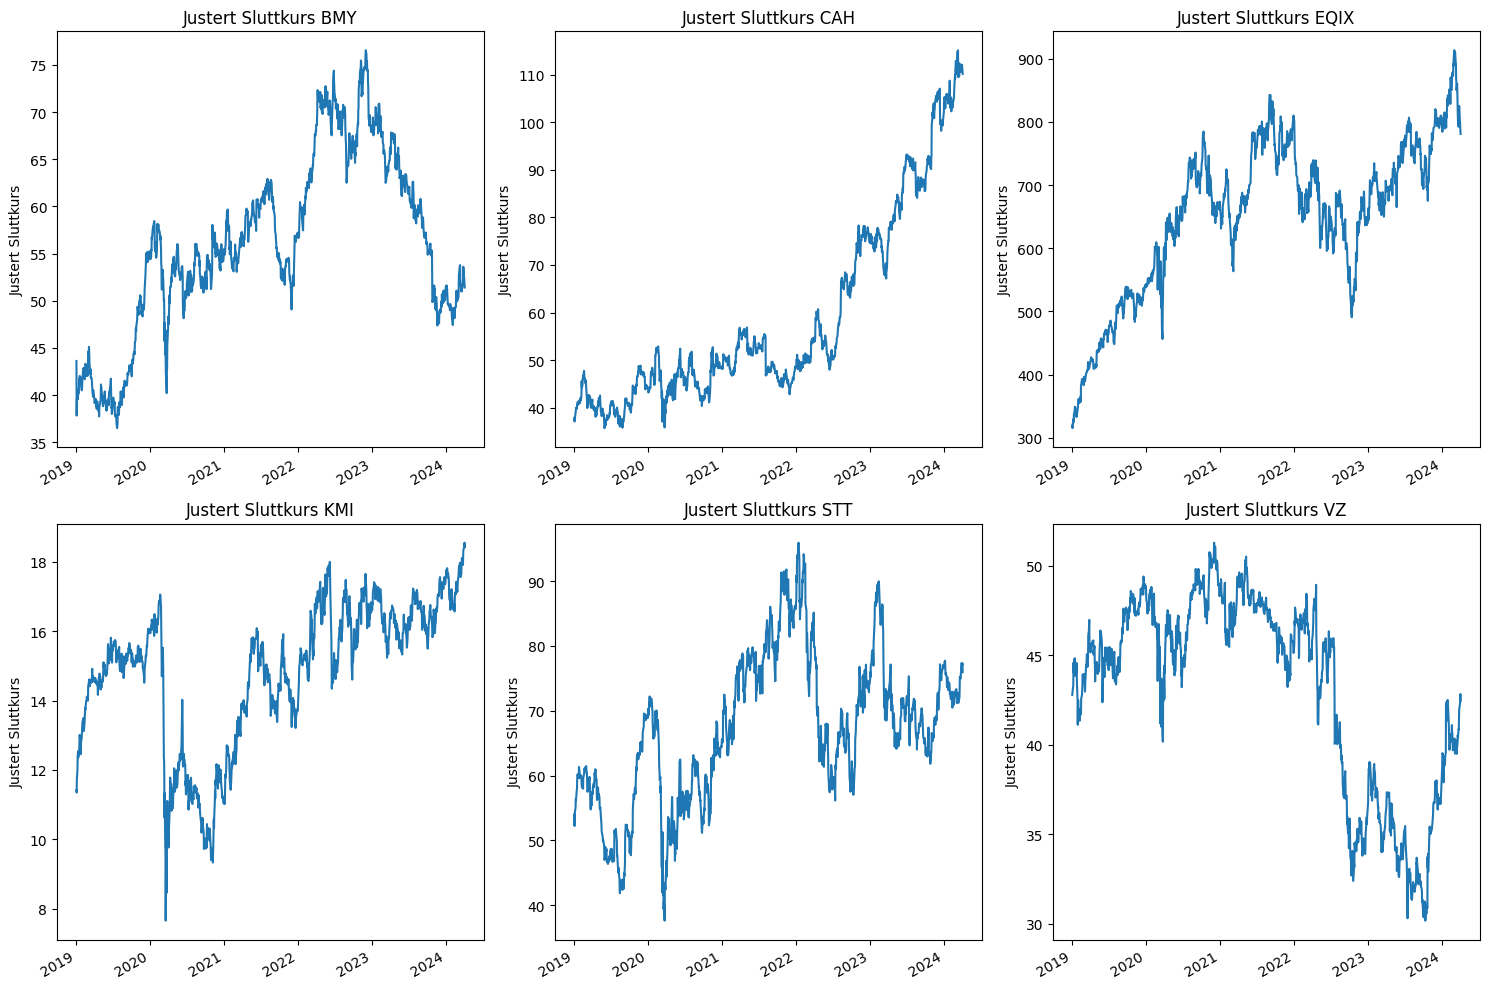

In [169]:
#Plotter sluttkurs, distibusjon og korrelasjon for hvert selskap
plt.figure(figsize= (15,10))

for i, name in enumerate(tickers, 1):
       plt.subplot(2, 3 , i)
       df[name].plot()
       plt.ylabel('Justert Sluttkurs')
       plt.xlabel(None)
       plt.title(f'Justert Sluttkurs {name}')

plt.tight_layout()    

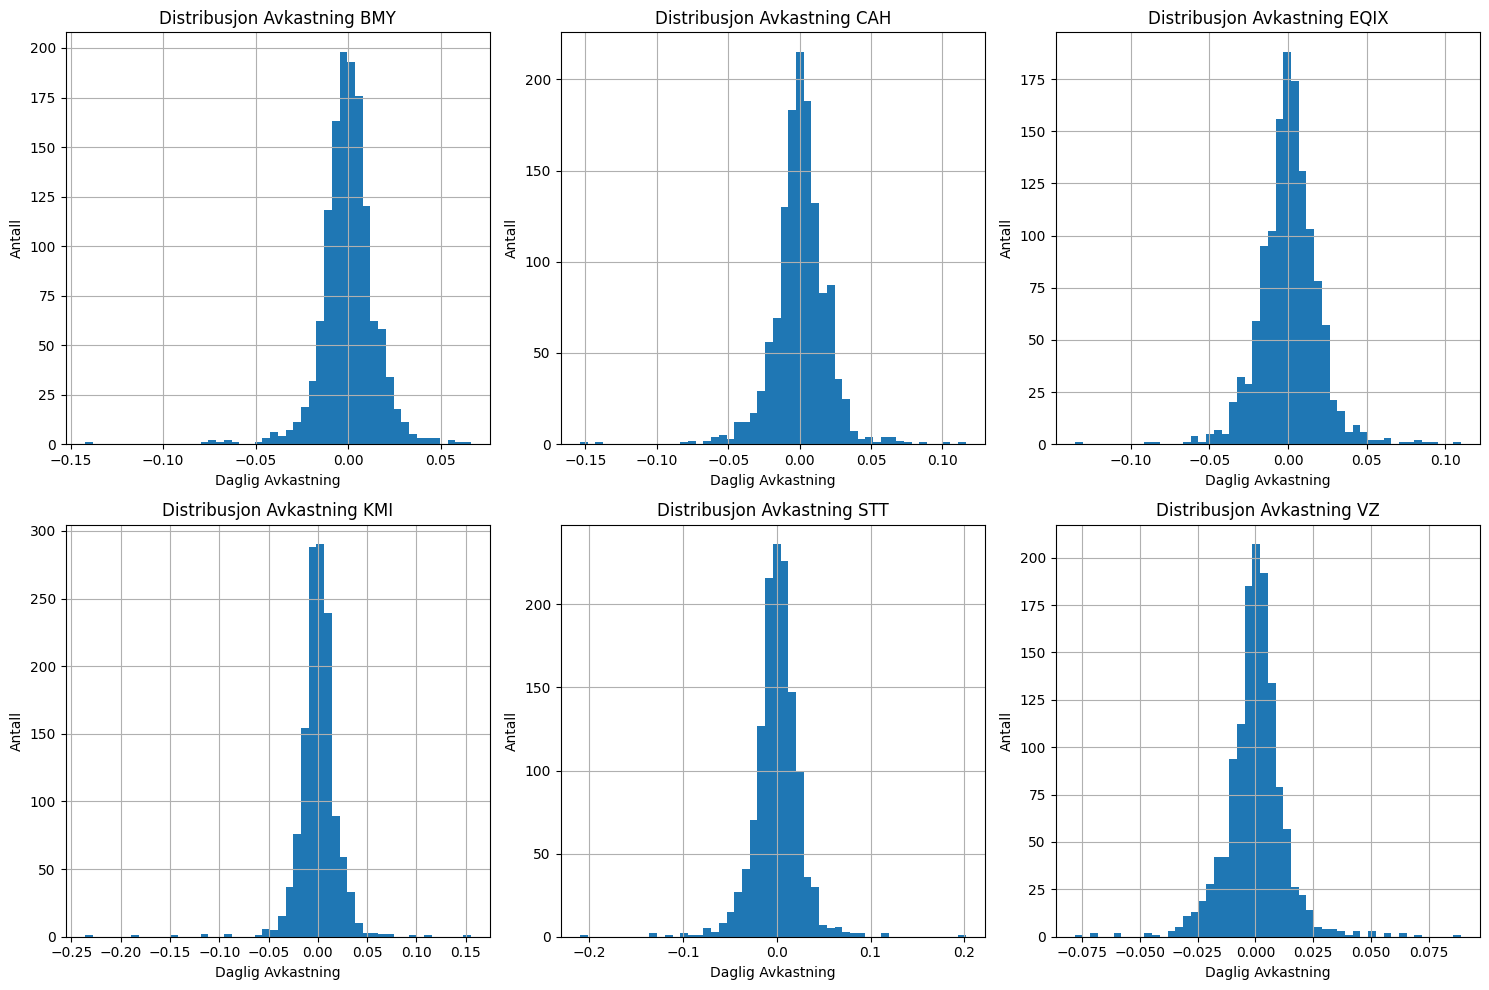

In [170]:
plt.figure(figsize= (15,10))

for i, name in enumerate(tickers, 1):
    plt.subplot(2, 3 , i)
    returns[name].hist(bins = 50)
    plt.ylabel('Antall')
    plt.xlabel('Daglig Avkastning')
    plt.title(f'Distribusjon Avkastning {name}')
    
plt.tight_layout()

(Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, ''))

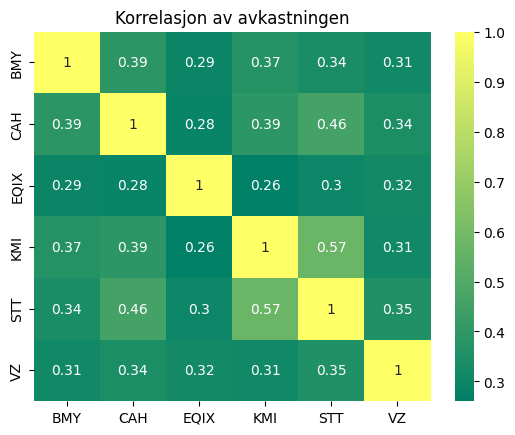

In [171]:
sns.heatmap(returns.corr(), annot=True, cmap='summer')
plt.title('Korrelasjon av avkastningen')
plt.xlabel(None), plt.ylabel(None)

In [172]:
#Simulering av portefølje vekter og tilhørende risiko og avkastning
p_ret = []
p_vol = []
p_weights = []
p_sharpe = []

y_ret = avg_return*250

antall = len(df.columns)
num_port = 10000

#Kjører igjennom 10.000 simuleringer av portefølje sammensettninger
#for hver portefølje sammensetningen kalkuleres risiko og avkastning

for port in range(num_port):
       #Vekter
       weight = np.random.random(antall)
       weight = weight/np.sum(weight)
       p_weights.append(weight)
       
       #Avkastning
       ret = np.dot(weight,y_ret)
       p_ret.append(ret)

       #Risiko
       var = covar.mul(weight, axis=0).mul(weight, axis=1).sum().sum()
       std = np.sqrt(var)
       y_std = std*np.sqrt(250)
       p_vol.append(y_std)

       #Sharpe Ratio
       port_sharpe = (ret - 0.01) / y_std
       p_sharpe.append(port_sharpe)

#Ny dataframe med porteføljenes risiko og avkastning
data = {'Avkastning':p_ret, 'Risiko(SD)':p_vol}
#Legger til vektene for hver aksje
for counter, symbol in enumerate(df.columns.tolist()):
       data[symbol+' Vekt'] = [w[counter] for w in p_weights]

portfolios = pd.DataFrame(data)

In [173]:
#Portefølje sammensetningen med lavest risiko
min_vol_port = portfolios.iloc[portfolios['Risiko(SD)'].idxmin()]

print(min_vol_port*100)

Avkastning     4.807702
Risiko(SD)    17.076728
BMY Vekt      33.349869
CAH Vekt       9.038341
EQIX Vekt      9.014048
KMI Vekt       2.553951
STT Vekt       3.918583
VZ Vekt       42.125208
Name: 5156, dtype: float64


In [174]:
#Finner portefølje sammensetningen som gir oss høyest avkastning/risiko forhold (Høyest Sharpe Ratio)
rf = 0.01 #Risiko fri rente
optimal_risky_port = portfolios.iloc[((portfolios['Avkastning']-rf)/portfolios['Risiko(SD)']).idxmax()]

print(optimal_risky_port*100)

Avkastning    16.486321
Risiko(SD)    22.600539
BMY Vekt       7.167766
CAH Vekt      41.686220
EQIX Vekt     44.152211
KMI Vekt       1.157686
STT Vekt       4.224425
VZ Vekt        1.611691
Name: 5552, dtype: float64


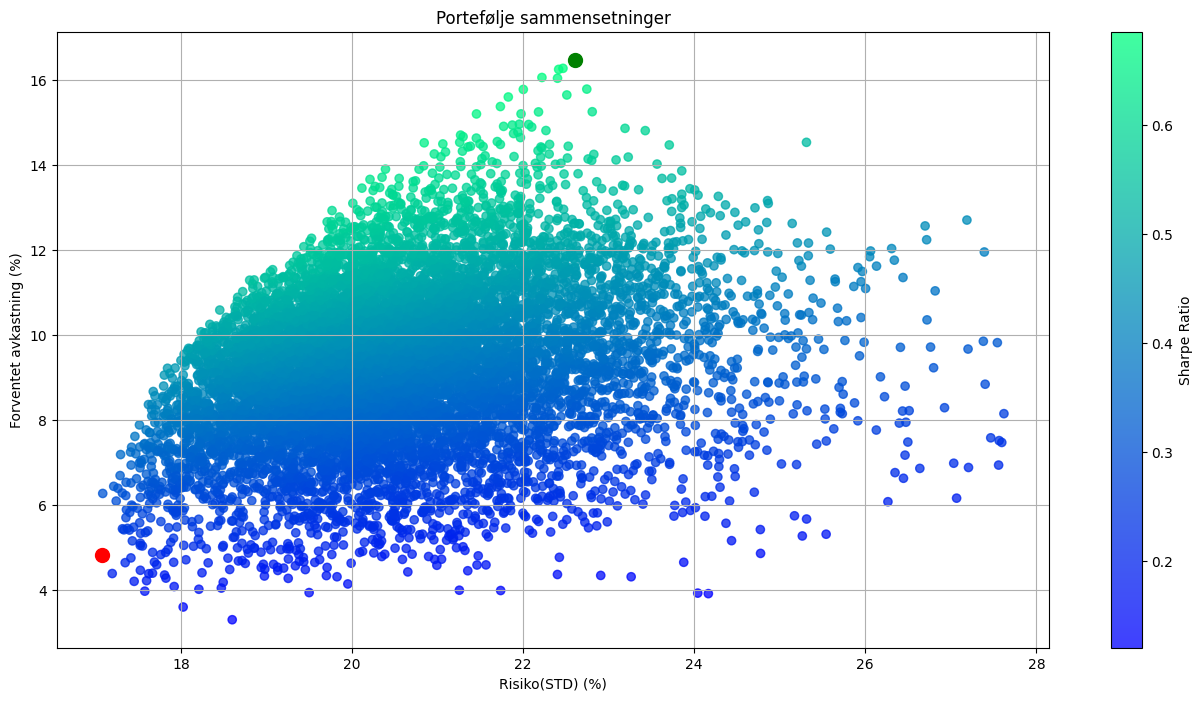

In [175]:
#Visualiserer dataen
plt.figure(figsize=(16, 8))

plt.scatter(
        portfolios['Risiko(SD)'] * 100.0,
        portfolios['Avkastning'] * 100.0,
        c=p_sharpe,
        cmap="winter",
        alpha=0.75)
plt.colorbar(label="Sharpe Ratio")

plt.scatter(min_vol_port.iloc[1]*100,
            min_vol_port.iloc[0]*100, 
            color='r', 
            marker='o', 
            s=100)

plt.scatter(optimal_risky_port.iloc[1]*100, 
            optimal_risky_port.iloc[0]*100, 
            color='g',
            marker='o', 
            s=100)

plt.xlabel("Risiko(STD) (%)")
plt.ylabel("Forventet avkastning (%)")
plt.grid()
plt.title("Portefølje sammensetninger")
plt.show()
